In [1]:
from utils.data import load_datasets
from vae.generation import Generator, augmentations
from vae.models import VAEConfig
import vae
vae.models.base.model_store = "pretrained_models/MNIST"

In [2]:
g = Generator(
    vae_config=VAEConfig(z_dim=10, beta=1.0),
    vae_epochs=50,
    multi_vae=False,
    seed=1338,
    no_mlflow=True,
)
dataset, _, _, _ = load_datasets("MNIST")

classes: tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])
class_counts: tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]), (50 total)
n = 10
x = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])
L = tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
----------------------------------------
class_counts: tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]), (50 total)
x = tensor([0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
        0.1000])
----------------------------------------
Augmented dataset from 50 samples to 100
----------------------------------------
class_counts: tensor([10, 10, 10, 10, 10, 10, 10, 10, 10, 10]), (100 total)
x = tensor([0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.2000,
        0.2000])


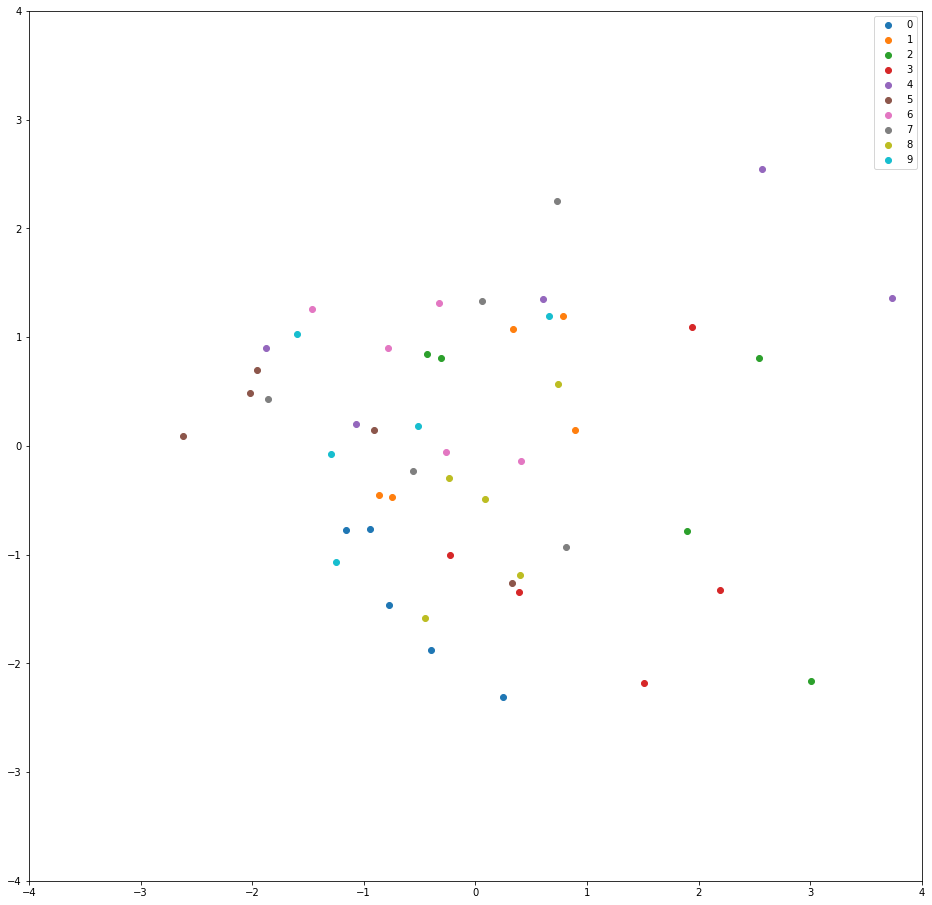

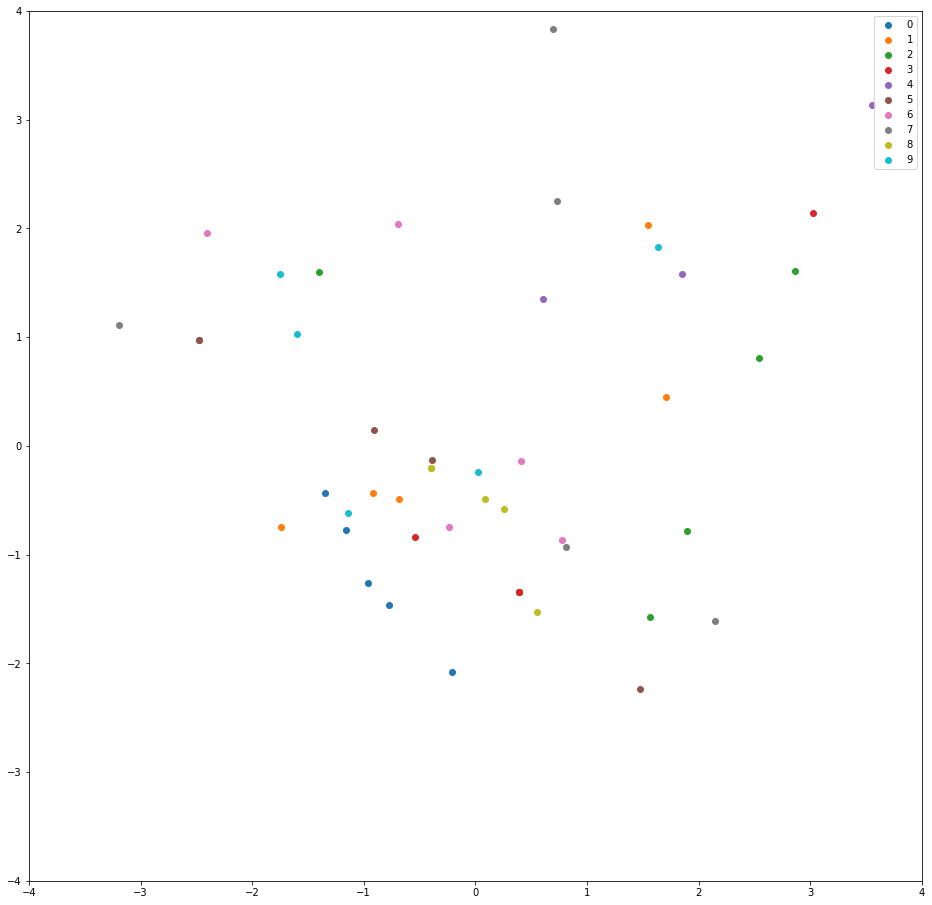

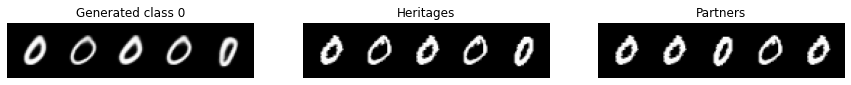

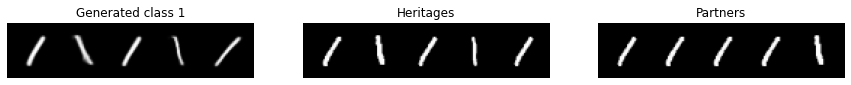

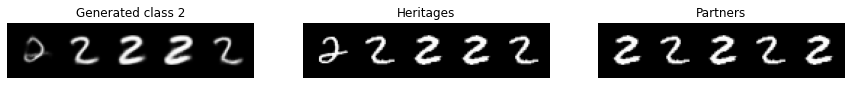

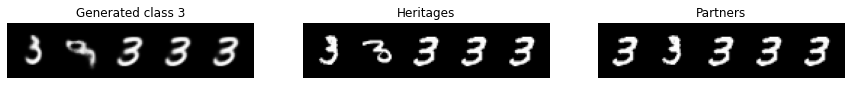

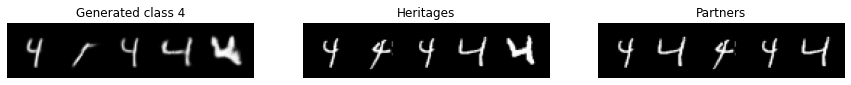

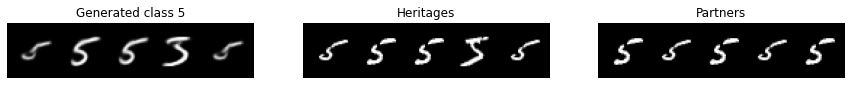

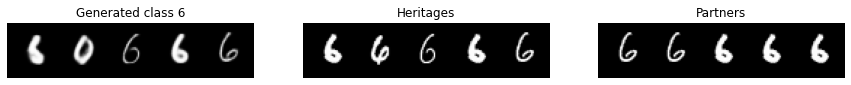

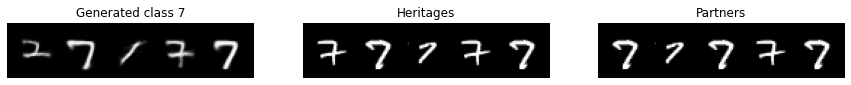

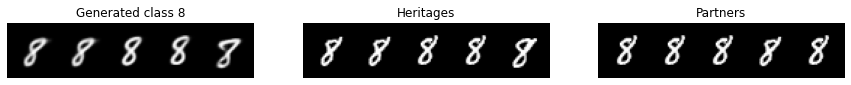

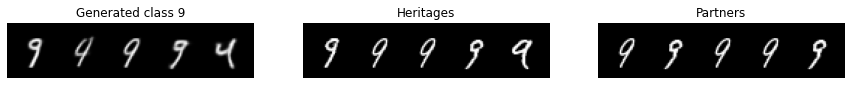

In [4]:
augmented = g.augment_dataset(dataset, augmentations.EXTRAPOLATION, K=50, n_neighbors=3, alpha=0.5)